In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

In [2]:
x ⪅ y = x < y || x ≈ y
safediv(x, y) = x == 0 ? x : y == Inf ? zero(y) : x/y

function pvalue_sterne_naive(n, k, p)
    bin = Binomial(n, p)
    p0 = pdf(bin, k)
    sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ p0)
end

function pvalue_clopper_pearson(n, k, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function pvalue_wilson(n, k, p)
    bin = Binomial(n, p)
    2ccdf(Normal(), abs(k - n*p)/√(n*p*(1-p)))
end

pvalue_wilson (generic function with 1 method)

pvalue_clopper_pearson(n, k, p) = 0.6075913612730798
pvalue_sterne_naive(n, k, p) = 0.6075913612730813
pvalue_wilson(n, k, p) = 0.4927166772270878


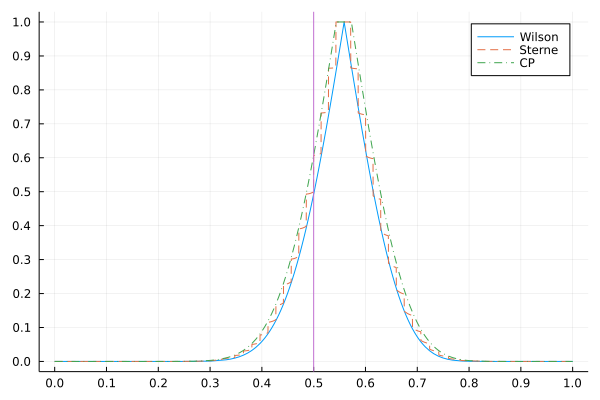

In [3]:
n, k, p = 34, 19, 0.5
@show pvalue_clopper_pearson(n, k, p)
@show pvalue_sterne_naive(n, k, p)
@show pvalue_wilson(n, k, p)

plot(p -> pvalue_wilson(n, k, p), 0, 1; label="Wilson")
plot!(p -> pvalue_sterne_naive(n, k, p), 0, 1; label="Sterne", ls=:dash)
plot!(p -> pvalue_clopper_pearson(n, k, p), 0, 1; label="CP", ls=:dashdot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
vline!([0.5]; label="")

pvalue_clopper_pearson(n, k, p) = 0.07681274414062504
pvalue_sterne_naive(n, k, p) = 0.076812744140625
pvalue_wilson(n, k, p) = 0.04550026389635841


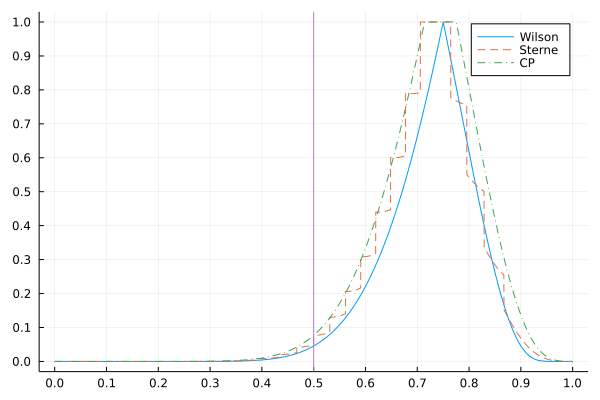

In [4]:
n, k, p = 16, 12, 0.5
@show pvalue_clopper_pearson(n, k, p)
@show pvalue_sterne_naive(n, k, p)
@show pvalue_wilson(n, k, p)

plot(p -> pvalue_wilson(n, k, p), 0, 1; label="Wilson")
plot!(p -> pvalue_sterne_naive(n, k, p), 0, 1; label="Sterne", ls=:dash)
plot!(p -> pvalue_clopper_pearson(n, k, p), 0, 1; label="CP", ls=:dashdot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
vline!([0.5]; label="")

pvalue_clopper_pearson(n, k, p) = 0.48068237304687533
pvalue_sterne_naive(n, k, p) = 0.48068237304687544
pvalue_wilson(n, k, p) = 0.3457785861511603


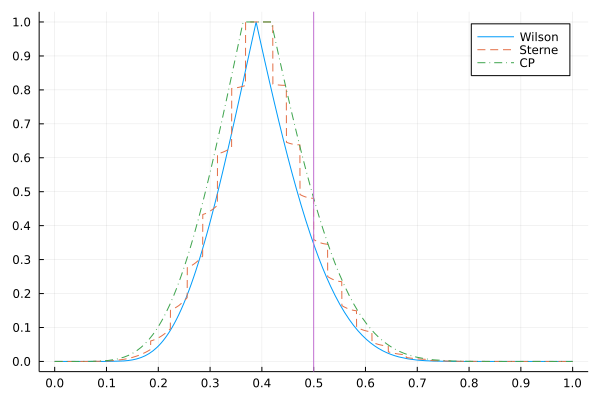

In [5]:
n, k, p = 18, 7, 0.5
@show pvalue_clopper_pearson(n, k, p)
@show pvalue_sterne_naive(n, k, p)
@show pvalue_wilson(n, k, p)

plot(p -> pvalue_wilson(n, k, p), 0, 1; label="Wilson")
plot!(p -> pvalue_sterne_naive(n, k, p), 0, 1; label="Sterne", ls=:dash)
plot!(p -> pvalue_clopper_pearson(n, k, p), 0, 1; label="CP", ls=:dashdot)
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
vline!([0.5]; label="")

In [6]:
using RCall

In [7]:
A = [
    4 11
    12 7
]
@rput A
R"""chisq.test(A, correct=F)"""

RObject{VecSxp}

	Pearson's Chi-squared test

data:  A
X-squared = 4.4803, df = 1, p-value = 0.03429



In [8]:
R"""fisher.test(A)"""

RObject{VecSxp}

	Fisher's Exact Test for Count Data

data:  A
p-value = 0.04544
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.03636964 1.12728150
sample estimates:
odds ratio 
 0.2229258 

